In [1]:
import pandas as pd
import numpy as np

# read in the data to a new dataframe
df = pd.read_csv('workshop2.csv')

df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


In [2]:
# remove the ocean_proximity column from the original data frame
df.drop("ocean_proximity", axis=1, inplace=True)

# verify this is the case
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200


In [3]:
# there seems to be some missing data inside total_bedrooms
missing_bedrooms = df["total_bedrooms"].isna()
print(f"Number of missing total_bedrooms values: {np.sum(missing_bedrooms)}")

# Check the data type of total_rooms
print("Data type of total_rooms:", df["total_rooms"].dtype)

# Look at a few values to see what we're dealing with
print("\nSample values from total_rooms:")
print(df["total_rooms"].head(10))

# Try to find non-numeric values
# This will attempt to convert without changing the original
test_conversion = pd.to_numeric(df["total_rooms"], errors="coerce")
non_numeric_mask = test_conversion.isna()
non_numeric_count = non_numeric_mask.sum()

print(f"\nNumber of non-numeric values detected: {non_numeric_count}")

# If there are non-numeric values, look at some examples
if non_numeric_count > 0:
    print("\nExamples of non-numeric values:")
    print(df.loc[non_numeric_mask, "total_rooms"].head())

# Convert total_rooms to numeric, forcing invalid values to NaN
df["total_rooms"] = pd.to_numeric(df["total_rooms"], errors="coerce")

# Count how many values are now NaN after conversion
invalid_rooms = df["total_rooms"].isna()
print(f"Number of invalid total_rooms values: {invalid_rooms.sum()}")

# Now let's check if both columns can be properly described
print("\nAfter conversion to numeric:")
print(df[["total_rooms", "total_bedrooms"]].describe())

# Drop rows with any missing or invalid values
df_clean = df.dropna()

# Check how many rows we have before and after
print(f"Original dataframe shape: {df.shape}")
print(f"Clean dataframe shape: {df_clean.shape}")
print(f"Number of rows removed: {df.shape[0] - df_clean.shape[0]}")

Number of missing total_bedrooms values: 207
Data type of total_rooms: object

Sample values from total_rooms:
0     880
1    7099
2    1467
3    1274
4    1627
5     919
6    2535
7    3104
8    2555
9    3549
Name: total_rooms, dtype: object

Number of non-numeric values detected: 1018

Examples of non-numeric values:
10    ??
29    ??
42    ??
58    ??
72    ??
Name: total_rooms, dtype: object
Number of invalid total_rooms values: 1018

After conversion to numeric:
        total_rooms  total_bedrooms
count  19622.000000    20433.000000
mean    2641.054327      537.870553
std     2191.830354      421.385070
min        2.000000        1.000000
25%     1450.000000      296.000000
50%     2126.500000      435.000000
75%     3148.000000      647.000000
max    39320.000000     6445.000000
Original dataframe shape: (20640, 9)
Clean dataframe shape: (19426, 9)
Number of rows removed: 1214


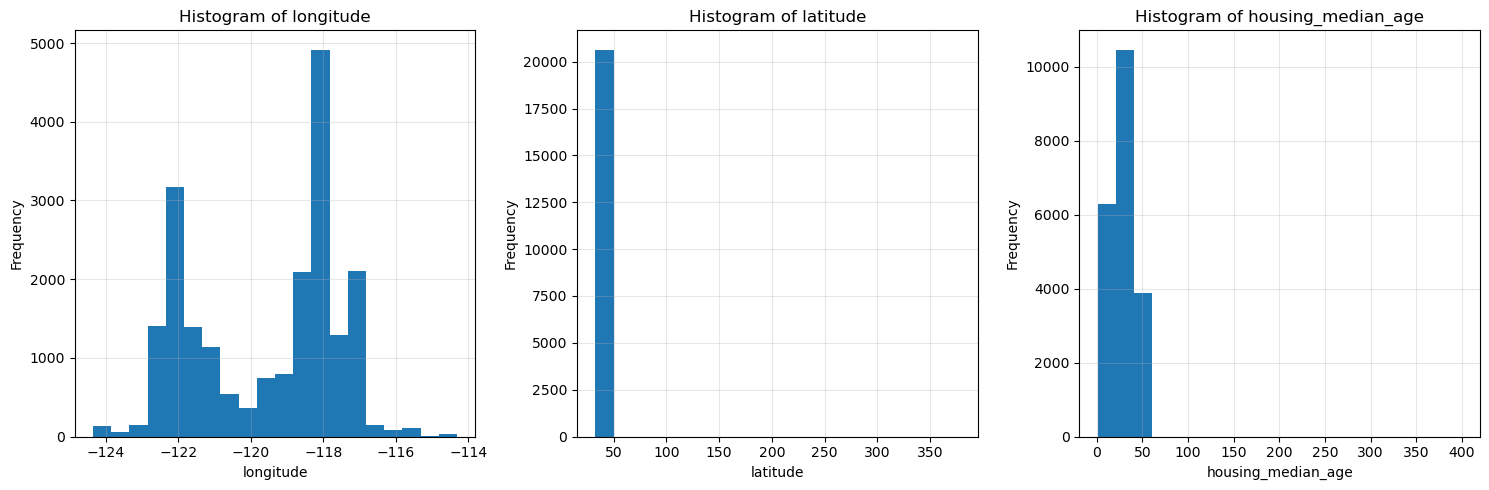

Statistics for longitude:
Min: -124.35
Max: -114.31
Mean: -119.57
------------------------------
Statistics for latitude:
Min: 32.54
Max: 378.0
Mean: 35.65
------------------------------
Statistics for housing_median_age:
Min: 1
Max: 400
Mean: 28.66
------------------------------


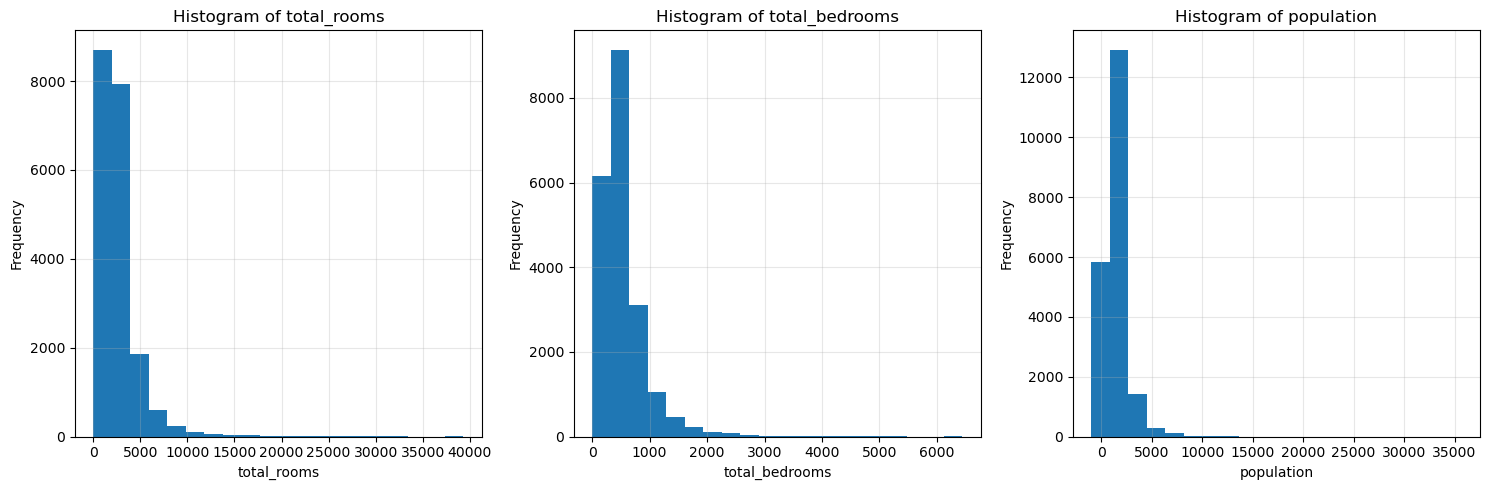

Statistics for total_rooms:
Min: 2.0
Max: 39320.0
Mean: 2641.05
------------------------------
Statistics for total_bedrooms:
Min: 1.0
Max: 6445.0
Mean: 537.87
------------------------------
Statistics for population:
Min: -999
Max: 35682
Mean: 1425.38
------------------------------


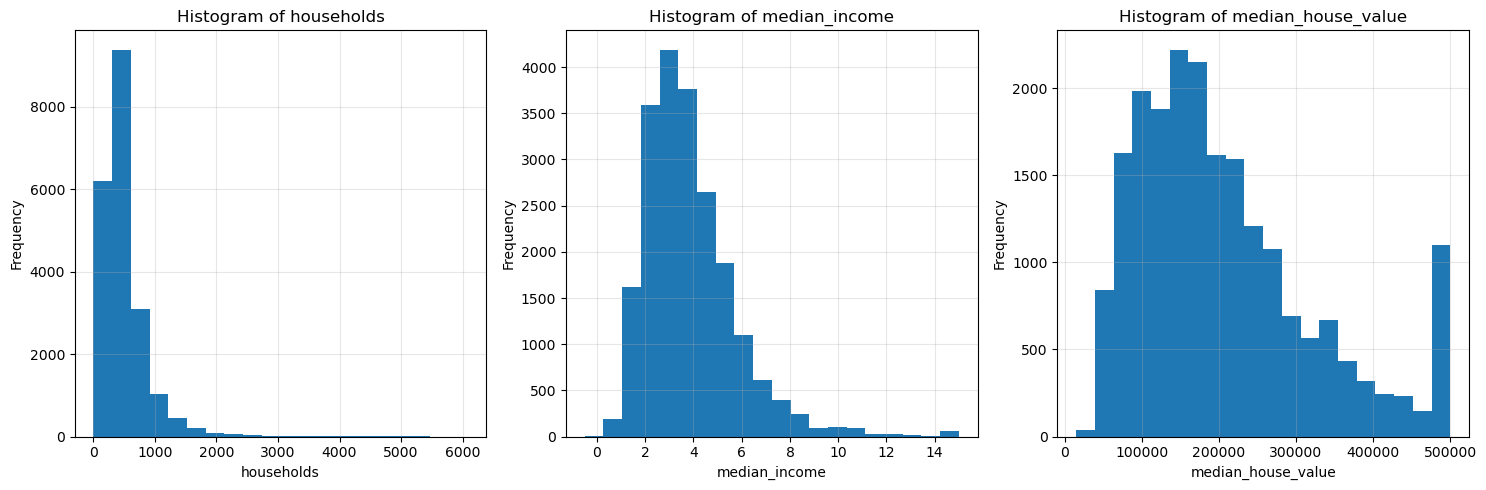

Statistics for households:
Min: 1
Max: 6082
Mean: 499.54
------------------------------
Statistics for median_income:
Min: -0.4999
Max: 15.0001
Mean: 3.87
------------------------------
Statistics for median_house_value:
Min: 14999
Max: 500001
Mean: 206855.82
------------------------------


In [4]:
# Create histograms in groups of 3 features per figure
import matplotlib.pyplot as plt
import numpy as np
numerical_features = df.select_dtypes(include=['number']).columns

# Process features in groups of 3
for i in range(0, len(numerical_features), 3):
    # Get the current group of features (up to 3)
    group = numerical_features[i:i+3]
    
    # Create a figure with subplots (1 row, up to 3 columns)
    fig, axes = plt.subplots(1, len(group), figsize=(15, 5))
    
    # Make sure axes is always treated as an array
    if len(group) == 1:
        axes = [axes]
    
    # Create a histogram for each feature in this group
    for j, feature in enumerate(group):
        axes[j].hist(df[feature], bins=20)
        axes[j].set_title(f'Histogram of {feature}')
        axes[j].set_xlabel(feature)
        axes[j].set_ylabel('Frequency')
        axes[j].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Print basic statistics for each feature in this group
    for feature in group:
        print(f"Statistics for {feature}:")
        print(f"Min: {df[feature].min()}")
        print(f"Max: {df[feature].max()}")
        print(f"Mean: {df[feature].mean():.2f}")
        print("-" * 30)

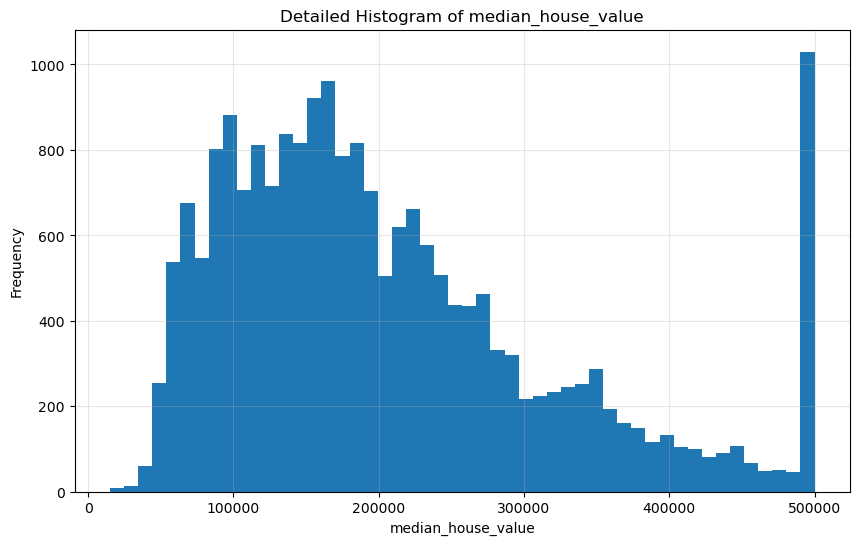

Maximum median_house_value: 500001
Number of entries with this maximum value: 965
Percentage of dataset: 4.68%


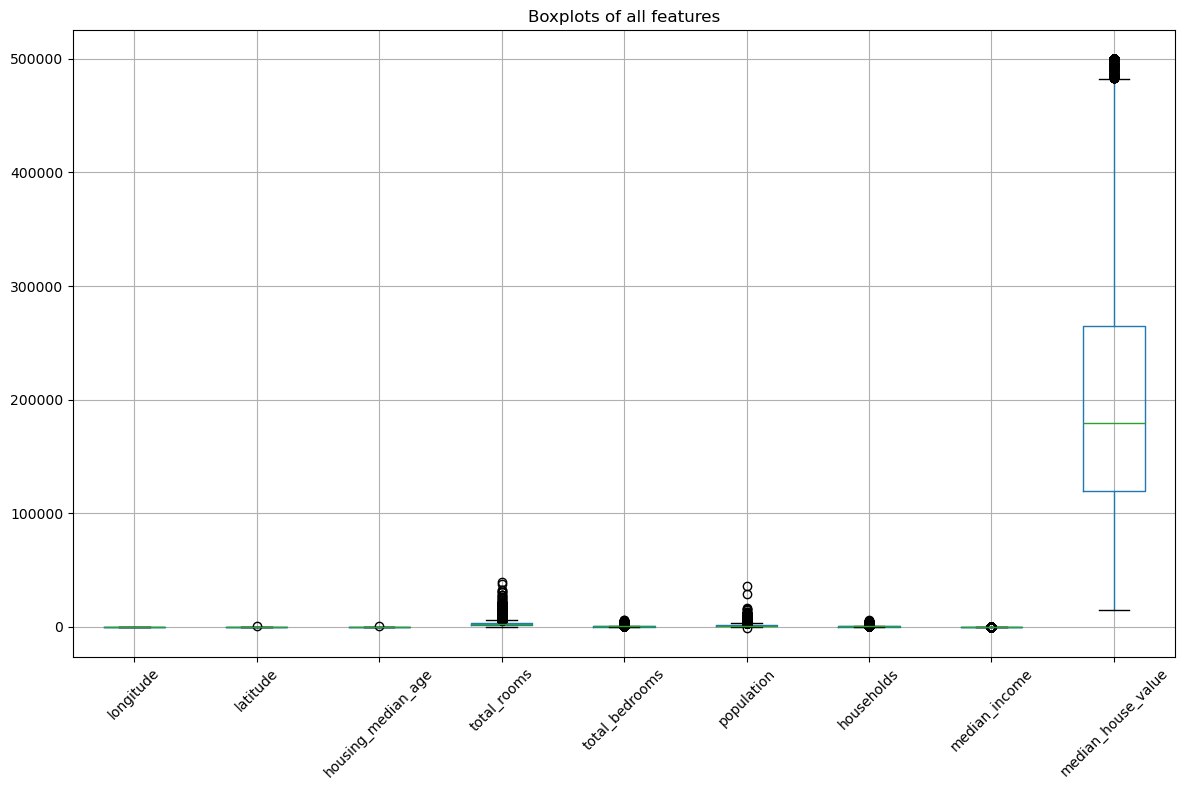

In [5]:
# The median house looks like it has an outlier. Let's investigate more.
import matplotlib.pyplot as plt

# Create a more detailed histogram with more bins
plt.figure(figsize=(10, 6))
plt.hist(df['median_house_value'], bins=50)  # Using 50 bins for more detail
plt.title('Detailed Histogram of median_house_value')
plt.xlabel('median_house_value')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()

# Also check the maximum value and its frequency
max_value = df['median_house_value'].max()
count_max = (df['median_house_value'] == max_value).sum()

print(f"Maximum median_house_value: {max_value}")
print(f"Number of entries with this maximum value: {count_max}")
print(f"Percentage of dataset: {(count_max / len(df)) * 100:.2f}%")

# Create boxplots for all numeric features in a single figure
plt.figure(figsize=(12, 8))
df.boxplot()
plt.title('Boxplots of all features')
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.tight_layout()
plt.show()

Set 965 entries to NaN
Original shape: (20640, 9)
Final shape: (18513, 9)
Removed 2127 rows


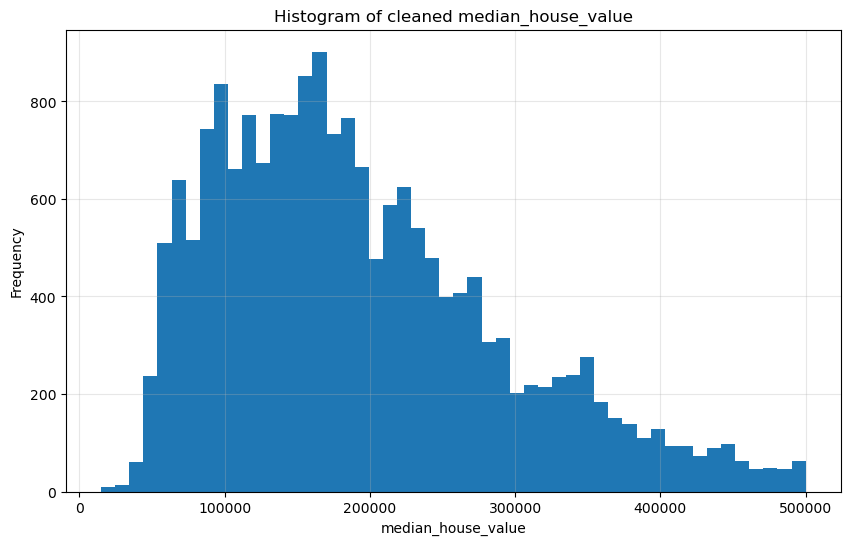

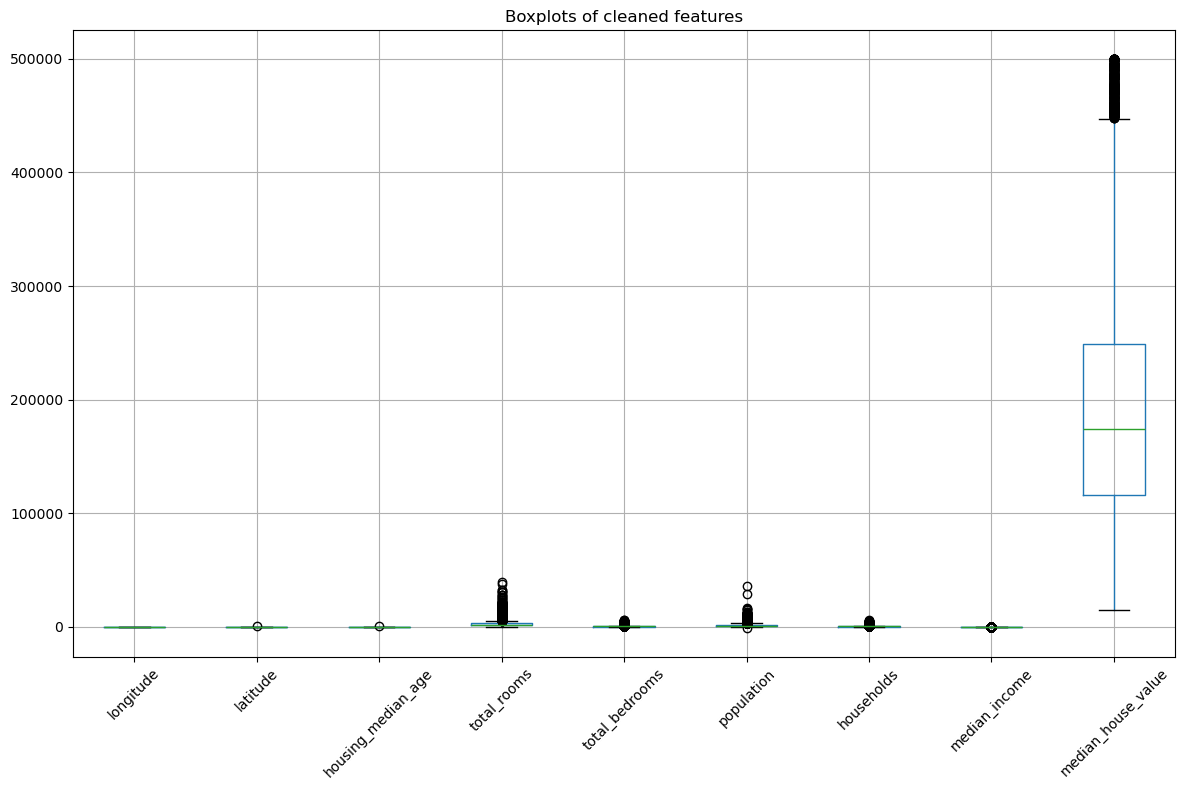

Cleaned data statistics:
New maximum median_house_value: 500000.0
New minimum median_house_value: 14999.0
New mean median_house_value: 192690.21


In [6]:
# Create a deep copy of the dataframe
df_cleaned = df.copy(deep=True)

# Set the maximum value entries to NaN
max_value = df['median_house_value'].max()
df_cleaned.loc[df_cleaned['median_house_value'] == max_value, 'median_house_value'] = np.nan

print(f"Set {(df['median_house_value'] == max_value).sum()} entries to NaN")

# Drop rows with any NaN values
df_final = df_cleaned.dropna()

print(f"Original shape: {df.shape}")
print(f"Final shape: {df_final.shape}")
print(f"Removed {df.shape[0] - df_final.shape[0]} rows")

# Create a histogram for the cleaned data
plt.figure(figsize=(10, 6))
plt.hist(df_final['median_house_value'], bins=50)
plt.title('Histogram of cleaned median_house_value')
plt.xlabel('median_house_value')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()

# Create boxplot for the cleaned data
plt.figure(figsize=(12, 8))
df_final.boxplot()
plt.title('Boxplots of cleaned features')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print summary statistics
print("Cleaned data statistics:")
print(f"New maximum median_house_value: {df_final['median_house_value'].max()}")
print(f"New minimum median_house_value: {df_final['median_house_value'].min()}")
print(f"New mean median_house_value: {df_final['median_house_value'].mean():.2f}")

In [7]:
# Import the necessary function from sklearn
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df_final.drop("median_house_value", axis=1)  # All columns except median_house_value
y = df_final["median_house_value"]               # Just median_house_value column

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print results of the split
print("Training/test split complete:")
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")

Training/test split complete:
X_train shape: (14810, 8), X_test shape: (3703, 8)


Mean Squared Error: 4603431408.01
Root Mean Squared Error: 67848.59
R² Score: 0.52


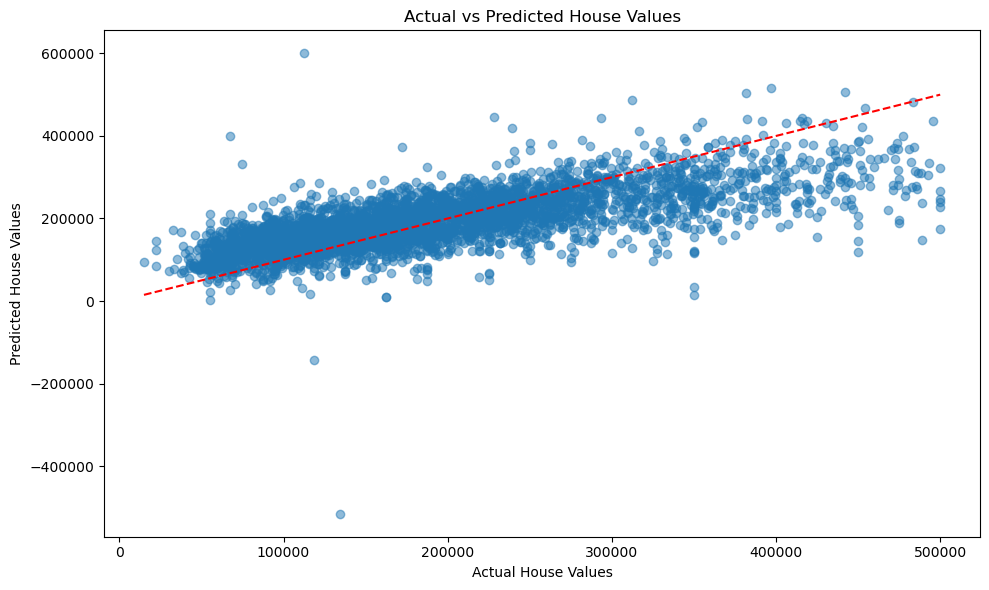


Model Coefficients (Feature Importance):
              Feature   Coefficient
7       median_income  47481.704516
2  housing_median_age   1509.741977
6          households    110.963162
4      total_bedrooms     99.386334
3         total_rooms    -19.817314
5          population    -31.692730
1            latitude  -2583.301650
0           longitude  -3275.153451


In [8]:
# Import the linear regression model from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Initialize the linear regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

# Visualize the predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual House Values')
plt.ylabel('Predicted House Values')
plt.title('Actual vs Predicted House Values')
plt.tight_layout()
plt.show()

# Optionally, examine the model coefficients to understand feature importance
coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

print("\nModel Coefficients (Feature Importance):")
print(coefficients)

Set 965 entries to NaN
Number of missing total_bedrooms values: 207
Number of missing median_house_value values: 965
Number of invalid total_rooms values: 1018
Missing values after imputation:
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64
Original shape: (20640, 9)
Final shape with imputation: (19675, 9)
Final shape with row dropping: (18513, 9)
Saved 1162 rows through imputation


/tmp/ipykernel_602720/2669097522.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_imputed["total_bedrooms"].fillna(median_bedrooms, inplace=True)
/tmp/ipykernel_602720/2669097522.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(val

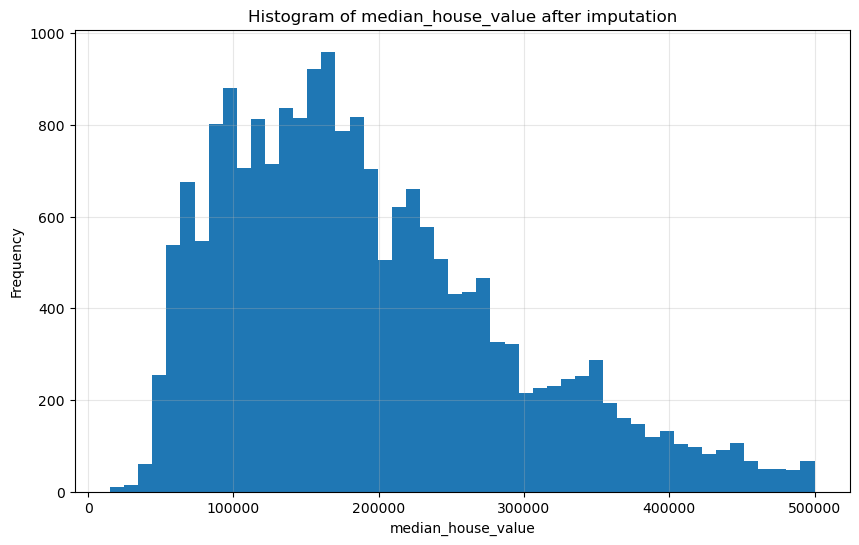

In [10]:
# Create a deep copy of the original dataframe for imputation approach
df_imputed = df.copy(deep=True)

# Handle the max values in median_house_value, same as before
max_value = df['median_house_value'].max()
df_imputed.loc[df_imputed['median_house_value'] == max_value, 'median_house_value'] = np.nan
print(f"Set {(df['median_house_value'] == max_value).sum()} entries to NaN")

# Convert total_rooms to numeric, forcing invalid values to NaN
df_imputed["total_rooms"] = pd.to_numeric(df_imputed["total_rooms"], errors="coerce")

# Identify missing valuesWHERE 
missing_bedrooms = df_imputed["total_bedrooms"].isna()
missing_house_values = df_imputed["median_house_value"].isna()
invalid_rooms = df_imputed["total_rooms"].isna()

print(f"Number of missing total_bedrooms values: {np.sum(missing_bedrooms)}")
print(f"Number of missing median_house_value values: {np.sum(missing_house_values)}")
print(f"Number of invalid total_rooms values: {invalid_rooms.sum()}")

# Calculate median values for imputation
median_bedrooms = df_imputed["total_bedrooms"].median()
median_rooms = df_imputed["total_rooms"].median()

# Impute missing values with median values (except for target variable)
df_imputed["total_bedrooms"].fillna(median_bedrooms, inplace=True)
df_imputed["total_rooms"].fillna(median_rooms, inplace=True)
# We still need to drop rows with missing target values
df_imputed = df_imputed.dropna(subset=["median_house_value"])

# Verify no more missing values in features
print(f"Missing values after imputation:")
print(df_imputed.isna().sum())

# Compare original and imputed dataframe shapes
print(f"Original shape: {df.shape}")
print(f"Final shape with imputation: {df_imputed.shape}")
print(f"Final shape with row dropping: {df_final.shape}")
print(f"Saved {df_imputed.shape[0] - df_final.shape[0]} rows through imputation")

# Create a histogram for the imputed data
plt.figure(figsize=(10, 6))
plt.hist(df_imputed['median_house_value'], bins=50)
plt.title('Histogram of median_house_value after imputation')
plt.xlabel('median_house_value')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()

# Define features (X) and target (y) using the imputed dataframe
X_imp = df_imputed.drop("median_house_value", axis=1)
y_imp = df_imputed["median_house_value"]

# Split the imputed data into training and test sets
X_train_imp, X_test_imp, y_train_imp, y_test_imp = train_test_split(
    X_imp, y_imp, test_size=0.2, random_state=42
)

# Initialize and train the linear regression model on imputed data
model_imp = LinearRegression()
model_imp.fit(X_train_imp, y_train_imp)

# Make predictions on the test set
y_pred_imp = model_imp.predict(X_test_imp)

# Evaluate the imputed model
mse_imp = mean_squared_error(y_test_imp, y_pred_imp)
rmse_imp = np.sqrt(mse_imp)
r2_imp = r2_score(y_test_imp, y_pred_imp)

# Print metrics for comparison
print("\nModel performance comparison:")
print("----------------------------")
print("Original model (dropped rows):")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")
print("\nNew model (with imputed values):")
print(f"RMSE: {rmse_imp:.2f}")
print(f"R² Score: {r2_imp:.2f}")

# Visualize both models for comparison
plt.figure(figsize=(12, 6))

# Left plot: Model with dropped rows
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual House Values')
plt.ylabel('Predicted House Values')
plt.title('Model with Dropped Rows')

# Right plot: Model with imputed values
plt.subplot(1, 2, 2)
plt.scatter(y_test_imp, y_pred_imp, alpha=0.5)
plt.plot([y_test_imp.min(), y_test_imp.max()], [y_test_imp.min(), y_test_imp.max()], 'r--')
plt.xlabel('Actual House Values')
plt.title('Model with Imputed Values')

plt.tight_layout()
plt.show()